# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 2: Criticas de cine</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

Importamos las librerias y modulos necesarios.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

2023-05-30 17:55:09.981131: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 17:55:12.438860: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 17:55:12.449019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 17:55:19.688241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Cargamos nuestro set de entrenamiento

In [3]:
df = pd.read_csv("dataset/train.csv")
df.head()

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


## Feature Engineering

Encodeamos el target para que las review positivas esten representadas por un 1 y las negativas por 0.

In [4]:
df['sentimiento_es_positivo'] = np.where(df.sentimiento == 'positivo', 1, 0)

## Sets de test y train
Dividimos el dataframe en datos de test y train. Usaremos estos mismos sets para el entrenamiento de todos los modelos.

In [25]:
X = df.review_es
y = df.sentimiento_es_positivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

## Ensamblado de modelos

### Bayes Naive
Primero transformamos nuestros documentos en una matriz en la cual se almacena la cantidad de tokens ("palabras clave"). Luego convertimos esa misma matriz en una representación normalizada de término/frecuencia. 
Esto lo hacemos para reducir el impacto de los tokens que aparecen más veces.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

vectorizador = CountVectorizer()
X_train_counts = vectorizador.fit_transform(X_train)

escaladorTfidf = TfidfTransformer()
X_train_tfidf = escaladorTfidf.fit_transform(X_train_counts)

Ahora que tenemos la información en el formato correcto, creamos nuestro modelo de tipo Bayes Naive. En este caso usamos uno de tipo multinomial.

In [48]:
clasificadorBayesNaive = MultinomialNB()
clasificadorBayesNaive.fit(X_train_tfidf, y_train)

MultinomialNB()

Realizamos el mismo procedimiento para transformar los datos de validación y poder realizar nuestras predicciones.

In [55]:
X_test_counts = vectorizador.transform(X_test)
X_test_tfidf = escaladorTfidf.transform(X_test_counts)
y_pred = np.where(clasificadorBayesNaive.predict(X_test_tfidf) >= 0.5, 1, 0)

Construimos nuestra matriz de confusión y analizamos métricas

Text(0.5, 1.0, 'Confusion matrix de training set')

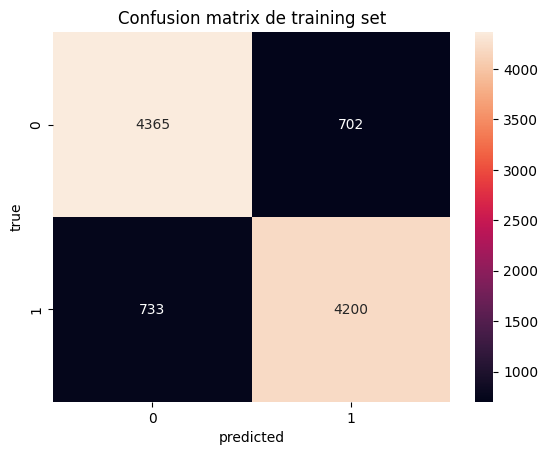

In [57]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de validación")

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, predictions)
print("F1-score:", f1)

### Random Forest

### XGBoost

### Red neuronal con Keras y TensorFlow

### Ensamble de modelos